In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import metics as mlks
import sklearn.metrics as sklm
from sklearn import datasets
import numpy.random as nr
%matplotlib inline

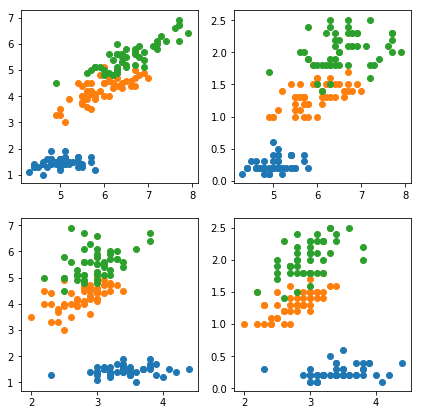

In [3]:
def plot_iris(iris):
    fig,ax = plt.subplots(2,2,figsize = (7,7))
    x = ['Sepal_Length', 'Sepal_Width']
    y = ['Petal_Length', 'Petal_Width']
    setosa    = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    for i in range(2):
        for j in range(2):
            ax[i][j].scatter(setosa[x[i]],setosa[y[j]])
            ax[i][j].scatter(versicolor[x[i]],versicolor[y[j]] )
            ax[i][j].scatter(virginica[x[i]],virginica[y[j]])
            
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

## Plot views of the iris data            
plot_iris(iris)   

In [4]:
Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])
levels   = {'setosa':0,'versicolor':1,'virginica':2}
Labels   = np.array([levels[x] for x in iris['Species']])
print(Labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
#from sklearn import model_selection as ms
import sklearn.model_selection as ms
nr.seed(1234)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx,test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test  = Features[indx[1],:]
y_test  = np.ravel(Labels[indx[1]])

In [6]:
from sklearn import preprocessing
from sklearn import naive_bayes

scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

nr.seed(1234)
model = naive_bayes.GaussianNB()
model.fit(X_train,y_train)

X_test = scale.transform(X_test)
scores=model.predict(X_test)

In [7]:
def metrics (labels,score):
    print('Metrics')
    #m= mlks.confusion()
    m = sklm.confusion_matrix(labels,score)
    print('                 Score Setosa','  ','Score Versicolor','     Score Virginica')
    print('Actual Setosa%10d'%m[0,0],'   %15d'%m[0,1],'   %20d'%m[0,2])
    print('Actual Versicolor%6d'%m[1,0],'  %16d'%m[1,1],'  %21d'%m[1,2])
    print('Actual Virginica%7d'%m[2,0],'  %16d'%m[2,1],' %22d'%m[2,2])
    print(sklm.accuracy_score(labels,score))
    m2 = sklm.precision_recall_fscore_support(labels,score)
    print('Num case             ',m2[3][0],'              ',m2[3][1],'                    ',m2[3][2])
    print('Precision%16.2f'%m2[0][0],' %16.2f'%m2[0][1],'  %20.2f'%m2[0][2])
    print('Recall%19.2f'%m2[1][0],' %16.2f'%m2[1][1],' %21.2f'%m2[1][2])
    print('F Score%18.2f'%m2[2][0],' %16.2f'%m2[2][1],' %21.2f'%m2[2][2])
metrics(y_test,scores)

Metrics
                 Score Setosa    Score Versicolor      Score Virginica
Actual Setosa        34                  0                       0
Actual Versicolor     0                 28                       7
Actual Virginica      0                  0                      31
0.93
Num case              34                35                      31
Precision            1.00              1.00                   0.82
Recall               1.00              0.80                   1.00
F Score              1.00              0.89                   0.90


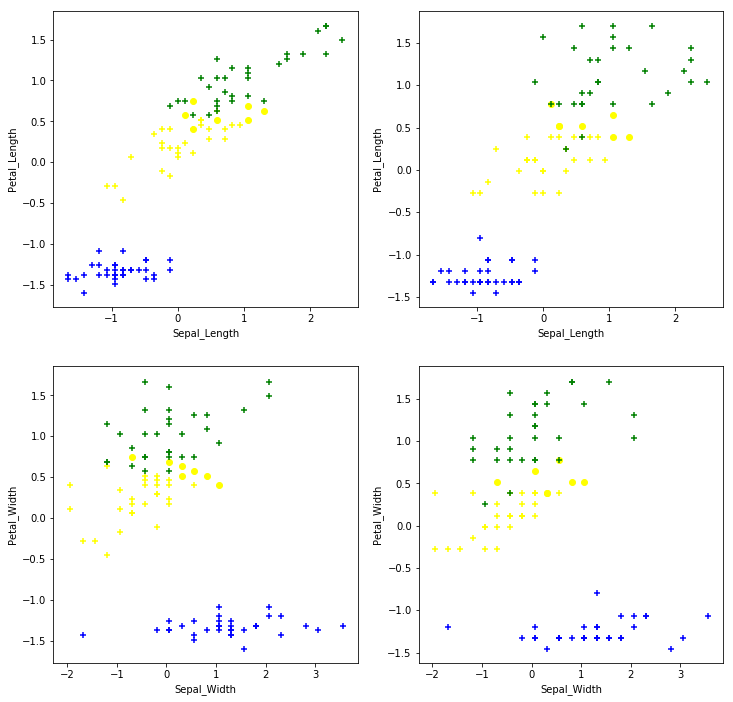

In [8]:
def plot_iris2(iris,y_test,score):
    true = np.equal(y_test,score).astype(int)
    iris = pd.DataFrame(iris,columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
    levels = {0:'setosa',1:'versicolor',2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    markers = ['o','+']
    
    fig,ax = plt.subplots(2,2,figsize = (12,12))
    x = ['Sepal_Length', 'Sepal_Width']
    y = ['Petal_Length', 'Petal_Width']
    
    for t in range(2):
        setosa    = iris[ (iris['Species'] == 'setosa')     &  (true ==t)]
        versicolor= iris[ (iris['Species'] == 'versicolor') & (true ==t)]
        virginica = iris[ (iris['Species'] == 'virginica')  & (true ==t)]
        for i in range(2):
            for j in range(2):
                ax[i][j].scatter(setosa[x[i]],setosa[y[j]] ,marker = markers[t],color = 'blue')
                ax[i][j].scatter(versicolor[x[i]],versicolor[y[j]] ,marker = markers[t],color = 'yellow')
                ax[i][j].scatter(virginica[x[i]],virginica[y[j]],marker = markers[t],color = 'green')
                ax[i][j].set_xlabel(x[i])
                ax[i][j].set_ylabel(y[i])
plot_iris2(X_test,y_test,scores)